In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Visualize the feature maps
def plot_fm(fmaps):
  for i, fm in enumerate(fmaps, 1):
    x = fm
    x = x.detach().numpy()
    print("Feature Map: {}".format(i))
    plt.imshow(x)
    plt.show()

### Convolution Operation (OOP way)

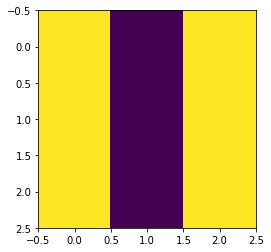

In [3]:
image = torch.tensor([[[10.,1.,10.],
                      [10.,1.,10.],
                      [10.,1.,10.]]])

# Visualizing the image
plt.imshow(np.squeeze(image))

In [4]:
# Creating a convolution filter

# in_channels = number of channels in image
# out_channels = number of feature maps
# kernel_size = 3x3
# stride = 1
# padding = 1
conv_filter = nn.Conv2d(in_channels=1, out_channels=5,
                   kernel_size=3, stride=1,
                   padding=1)

# Convolving the filter over image 
output = conv_filter(image)

Feature Map: 1


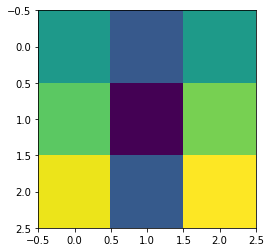

Feature Map: 2


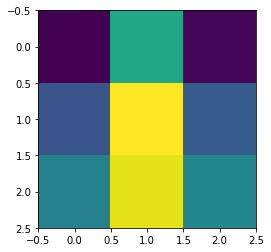

Feature Map: 3


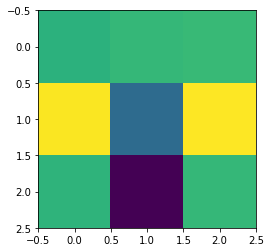

Feature Map: 4


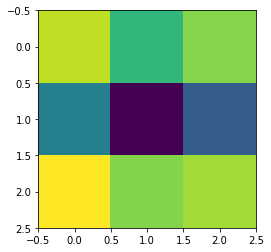

Feature Map: 5


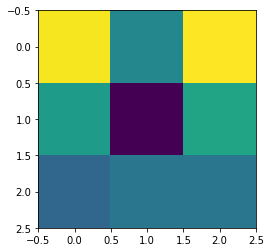

In [5]:
# Visualizing the Feature Maps
plot_fm(output)

### Convolution Operation (Functional way)

In [6]:
filter = torch.rand(5, 1, 3, 3)
f_map = F.conv2d(image, filter, stride=1, padding=1)

Feature Map: 1


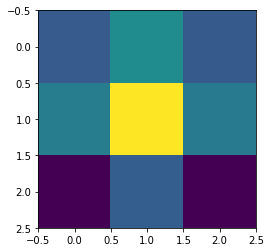

Feature Map: 2


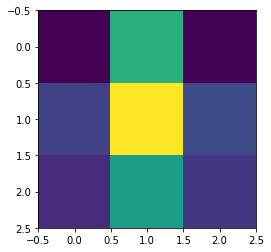

Feature Map: 3


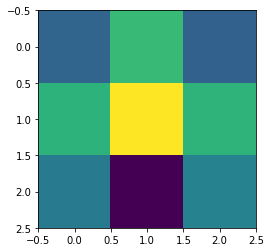

Feature Map: 4


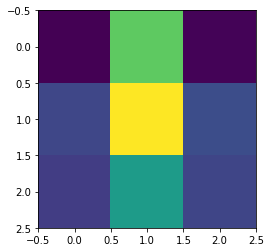

Feature Map: 5


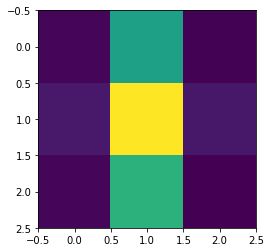

In [7]:
plot_fm(f_map)

### Pooling Layer - Selecting strong features
- Reduces the feature map size -> Faster computation because # of parameters are reduced
- Making network robust
<br>

# Types
1. Max-Pooling (e.g. 2x2 filters and stride 2) - Take maximum values while convolving
2. Average Pooling - Take average value of region

Image Shape:  torch.Size([1, 1, 5, 5])


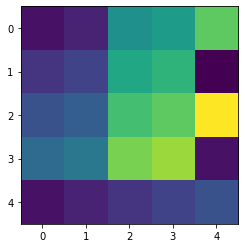

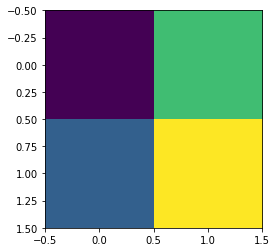

tensor([[[[ 2.5000, 11.5000],
          [ 6.5000, 15.5000]]]])


In [8]:
# Max Pooling (OOP)
img = torch.Tensor([[[[1,2,10,11,15],[3,4,12,13,0],
                      [5,6,14,15,20],[7,8,16,17,1],
                      [1,2,3,4,5]]]])
print("Image Shape: ", img.shape)
plt.imshow(np.squeeze(img))
plt.show()
max_pool = nn.AvgPool2d(2,2) # Change to nn.MaxPool2d(2) for max pooling
output = max_pool(img)
plt.imshow(np.squeeze(output))
plt.show()
print(output)

tensor([[[[ 4., 13.],
          [ 8., 17.]]]])


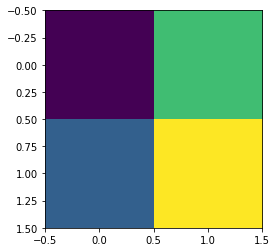

In [9]:
# Max Pooling (functional)
output = F.max_pool2d(img, 2) # This 2 indicates filter size (2x2) and stride of 2
print(output)
plt.imshow(np.squeeze(output))

### First CNN - Using MNIST Dataset

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307), ((0.3081))),
])

In [11]:
# Downloading and applying transforms on dataset
trainset = torchvision.datasets.MNIST(root='MNIST', train=True,
                                      transform=transform, download=True)
testset = torchvision.datasets.MNIST(root='MNIST', train=False,
                                     transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                           shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testset, batch_size=32,
                                          shuffle=False, num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



In [12]:
# Building the Network
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=5,
                           kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(in_channels=5, out_channels=10,
                           kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc = nn.Linear(7*7*10, 10)

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.pool(x)
    x = self.relu(self.conv2(x))
    x = self.pool(x)
    # Prepare the image for FC Layer
    # Transforming the feature map from 4 dimensional to 2 dimensional space. 
    # The first dimension contains the batch size (-1), deducting the second 
    # dimension, by multiplying the values for height, width and depth.
    x = x.view(-1, 7*7*10)
    x = self.fc(x)
    return x

In [13]:
# Training the NN
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

for i, data in enumerate(train_loader, 0):
  image, label = data
  optimizer.zero_grad()

  output = model(image)
  loss = criterion(output, label)
  loss.backward()
  optimizer.step()

In [14]:
model.eval()

total = correct = 0
for i, data in enumerate(test_loader, 0):
  image, label = data
  outputs = model(image)

  _, outputs = torch.max(outputs.data, 1)
  total += label.size(0)
  correct += (outputs == label).sum().item()
print("Accuracy: {}".format(100 * correct / total))
  # if (predicted == label).sum().item():
  #   print('Correct')
  # else:
  #   print('Wrong')

Accuracy: 95.09


### Validation Set Split

In [ ]:
# Shuffle the indices
# indices = np.arange(0, 60000)
# np.random.shuffle(indices)

# Build the train loader
# train_loader = torch.utils.data.DataLoader(datasets.MNIST('mnist', download=True, train=True,
#                      transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
#                      batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[:55000]))

# Build the validation loader
# val_loader = torch.utils.data.DataLoader(datasets.MNIST('mnist', download=True, train=True,
#                    transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
#                    batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[55000:]))

### Using CNNs
- Regularization
- Batch-Normalization
- Transfer Learning

#### The sequential module

In [24]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    # When using Batch-Normalization, Use this kind of network sequence
    # convolution, max-pool, activation, batch-norm, convolution, max-pool, relu, batch-norm
    # nn.BatchNorm2d(num_features=previous cnn out_channels)

    # Feature extraction
    self.features = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.ReLU(inplace=True)
    )

    # FC Network for classification
    self.classifier = nn.Sequential(
        nn.Linear(7*7*40, 1024),
        nn.ReLU(inplace=True),
        # Add nn.Dropout(p=0.5) for avoiding overfitting
        nn.Linear(1024, 2048),
        nn.ReLU(inplace=True),
        nn.Linear(2048, 10)
    )

  def forward(self, x):
    x = self.features(x)
    x = x.view(-1, 7*7*40)
    x = self.classifier(x)
    return x

In [25]:
model = Net()
criterion = nn.CrossEntropyLoss()

# Add weight_decay=0.001 for L2-regularization in Adam()
# Penalizes large weights, and enforces network to use only small weights

optimizer = torch.optim.Adam(model.parameters(), lr=3e-4) 

for i, data in enumerate(train_loader, 0):
  image, label = data
  
  optimizer.zero_grad()
  output = model(image)
  loss = criterion(output, label)
  loss.backward()
  optimizer.step()

In [26]:
# Testing the model
model.eval()

total = correct = 0
for i, data in enumerate(test_loader, 0):
  image, label = data

  output = model(image)
  _, output = torch.max(output, 1)
  total += label.size(0)
  correct += (output == label).sum().item()

print("Accuracy: {}".format(100 * correct / total))

Accuracy: 98.53
